# 3. Plotting for Exploratory data analysis (EDA)

# (3.1) Basic Terminology

* What is EDA?
* Data-point/vector/Observation
* Data-set.
* Feature/Variable/Input-variable/Dependent-varibale
* Label/Depdendent-variable/Output-variable/Class/Class-label/Response label
* Vector: 2-D, 3-D, 4-D,.... n-D

Q. What is a 1-D vector: Scalar



## Iris Flower dataset

Toy  Dataset: Iris Dataset: [https://en.wikipedia.org/wiki/Iris_flower_data_set]
* A simple dataset to learn the basics.
* 3 flowers of Iris species. [see images on wikipedia link above]
* 1936 by Ronald Fisher.
* Petal and Sepal: http://terpconnect.umd.edu/~petersd/666/html/iris_with_labels.jpg
*  Objective: Classify a new flower as belonging to one of the 3 classes given the 4 features.
* Importance of domain knowledge.
* Why use petal and sepal dimensions as features?
* Why do we not use 'color' as a feature?



In [3]:
import wget
#wget.download('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')

'iris (1).csv'

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


'''downlaod iris.csv from https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv'''
#Load Iris.csv into a pandas dataFrame.
iris = pd.read_csv("iris.csv")



In [5]:
# (Q) how many data-points and features?
print (iris.shape)

(150, 5)


In [6]:
#(Q) What are the column names in our dataset?
print (iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [7]:
#(Q) How many data points for each class are present? 
#(or) How many flowers for each species are present?

iris["species"].value_counts()
# balanced-dataset vs imbalanced datasets
#Iris is a balanced dataset as the number of data points for every class is 50.

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

# (3.2) 2-D Scatter Plot

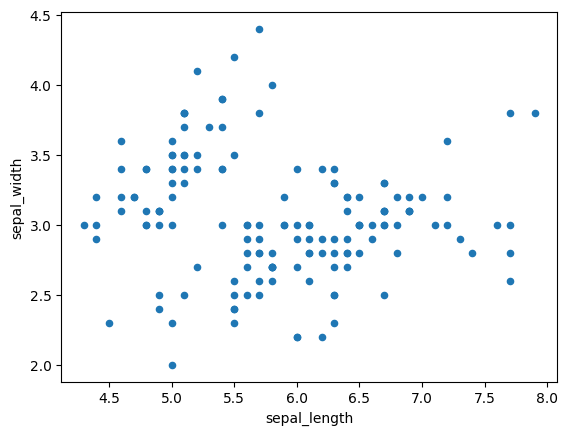

In [8]:
#2-D scatter plot:
#ALWAYS understand the axis: labels and scale.

iris.plot(kind='scatter', x='sepal_length', y='sepal_width') ;
plt.show()

#cannot make much sense out it. 
#What if we color the points by thier class-label/flower-type.

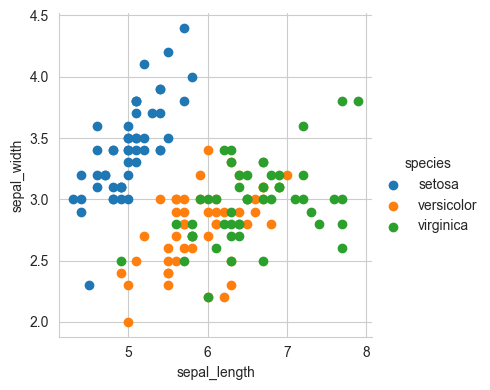

In [9]:
# 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid")
sns.FacetGrid(iris, hue="species", height=4) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend()
plt.show()

# Notice that the blue points can be easily seperated 
# from red and green by drawing a line. 
# But red and green data points cannot be easily seperated.
# Can we draw multiple 2-D scatter plots for each combination of features?
# How many cobinations exist? 4C2 = 6.

**Observation(s):**
1. Using sepal_length and sepal_width features, we can distinguish Setosa flowers from others.
2. Seperating Versicolor from Viginica is much harder as they have considerable overlap.

## 3D Scatter plot

https://plot.ly/pandas/3d-scatter-plots/

Needs a lot to mouse interaction to interpret data.

What about 4-D, 5-D or n-D scatter plot?

#  (3.3) Pair-plot

c:\Users\jrajp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


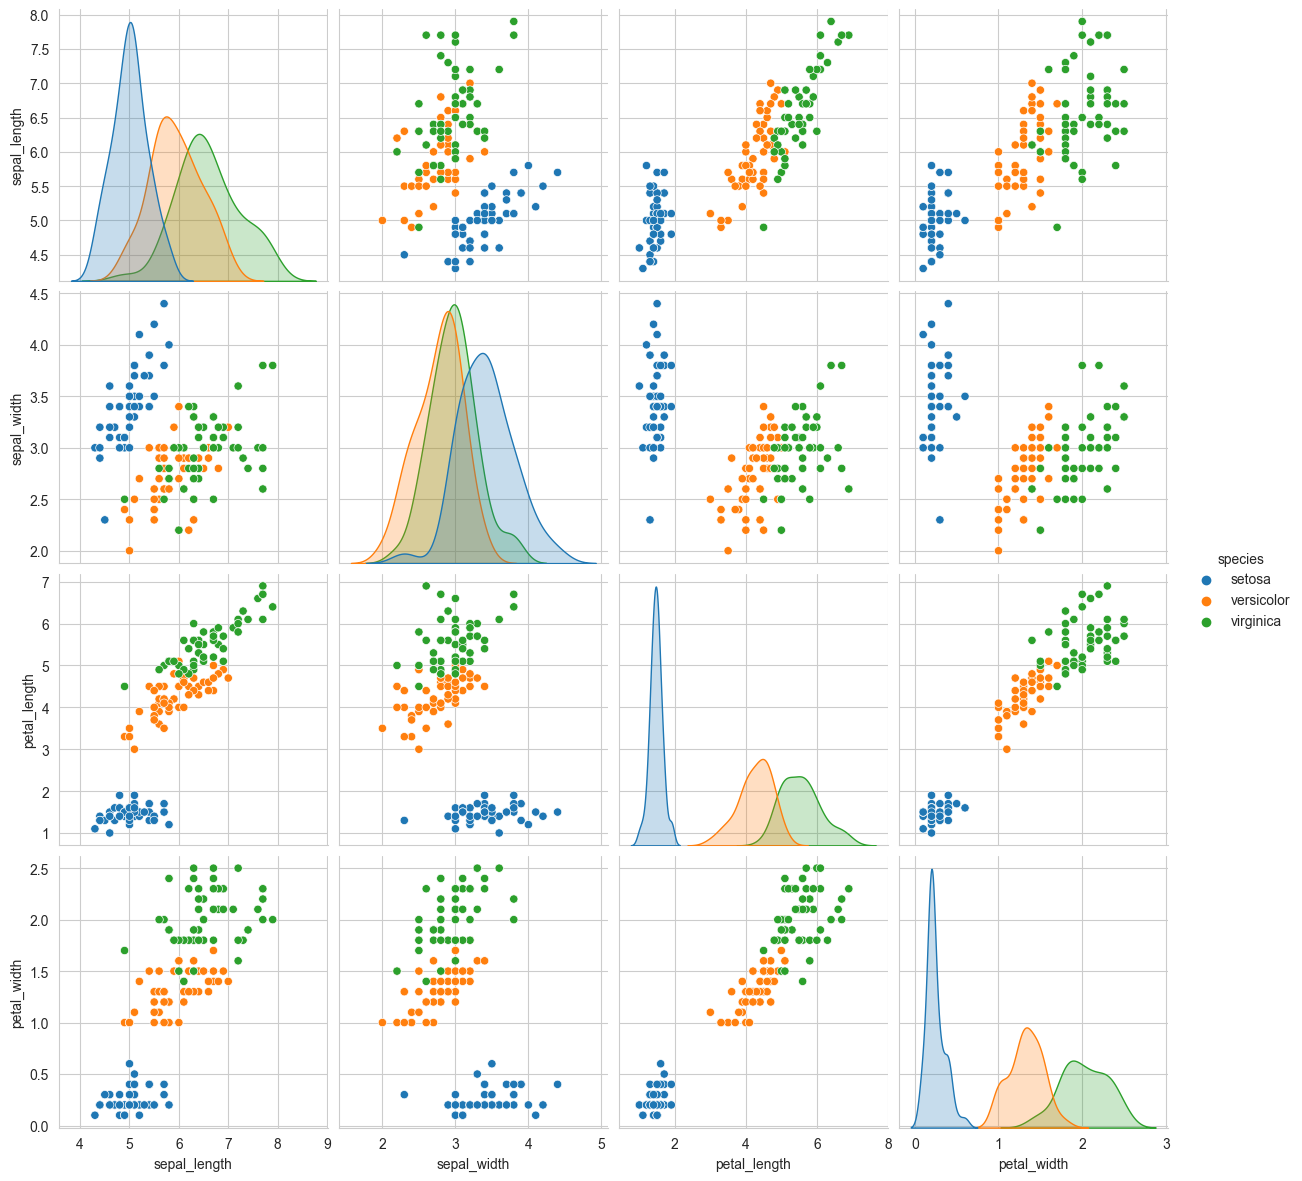

In [10]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
sns.set_style("whitegrid")
sns.pairplot(iris, hue="species", size=3)
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

**Observations**
1. petal_length and petal_width are the most useful features to identify various flower types.
2. While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (almost linearly seperable).
3. We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.

# (3.4) Histogram, PDF, CDF

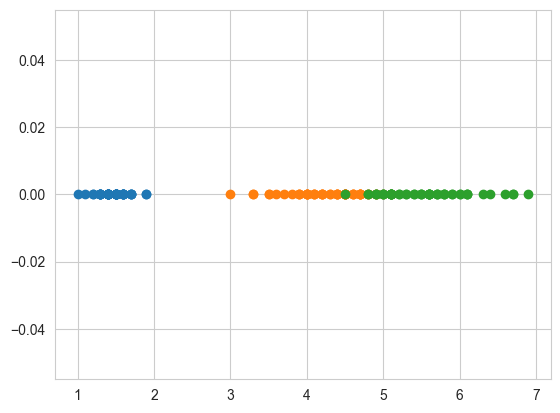

In [11]:
# What about 1-D scatter plot using just one feature?
#1-D scatter plot of petal-length
import numpy as np
iris_setosa = iris.loc[iris["species"] == "setosa"]
iris_virginica = iris.loc[iris["species"] == "virginica"]
iris_versicolor = iris.loc[iris["species"] == "versicolor"]

#print(iris_setosa["petal_length"])
plt.plot(iris_setosa["petal_length"], np.zeros_like(iris_setosa['petal_length']), 'o')
plt.plot(iris_versicolor["petal_length"], np.zeros_like(iris_versicolor['petal_length']), 'o')
plt.plot(iris_virginica["petal_length"], np.zeros_like(iris_virginica['petal_length']), 'o')

plt.show()
#Disadvantages of 1-D scatter plot: Very hard to make sense as points 
#are overlapping a lot.
#Are there better ways of visualizing 1-D scatter plots?

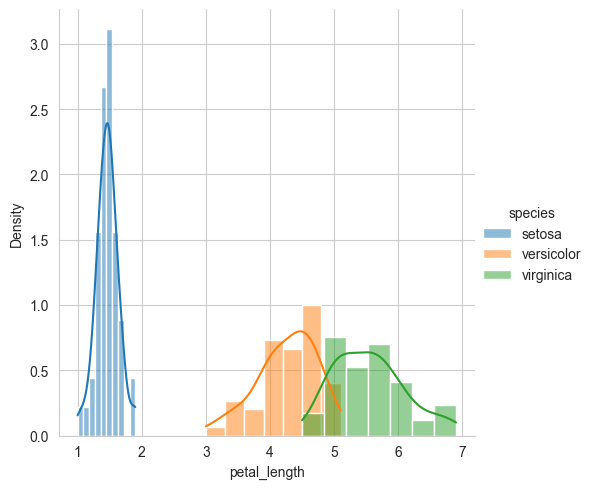

In [12]:
sns.FacetGrid(iris, hue="species", height=5) \
   .map(sns.histplot, "petal_length", kde=True, stat="density") \
   .add_legend()
plt.show()



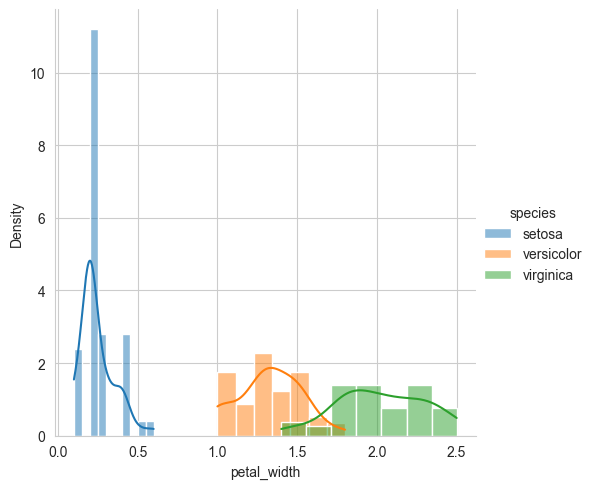

In [13]:
sns.FacetGrid(iris, hue="species", height=5) \
   .map(sns.histplot, "petal_width", kde=True, stat="density") \
   .add_legend()
plt.show()

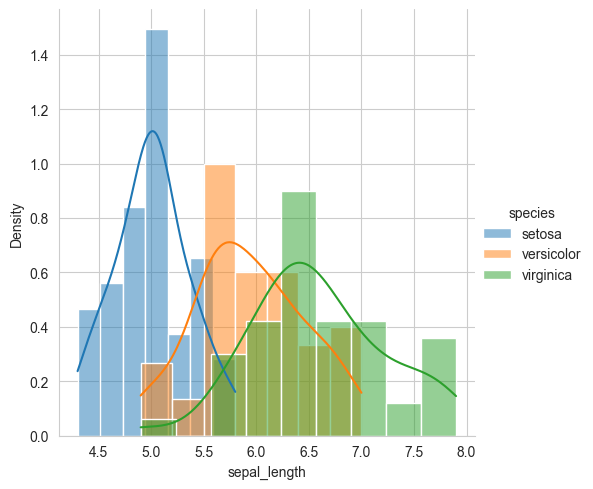

In [14]:
sns.FacetGrid(iris, hue="species", height=5) \
   .map(sns.histplot, "sepal_length", kde=True, stat="density") \
   .add_legend()
plt.show()

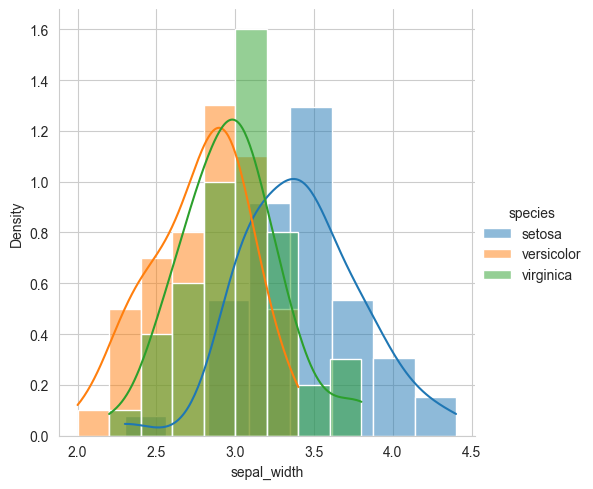

In [15]:
sns.FacetGrid(iris, hue="species", height=5) \
   .map(sns.histplot, "sepal_width", kde=True, stat="density") \
   .add_legend()
plt.show()

In [16]:
# Histograms and Probability Density Functions (PDF) using KDE
# How to compute PDFs using counts/frequencies of data points in each window.
# How window width effects the PDF plot.


# Interpreting a PDF:
## why is it called a density plot?
## Why is it called a probability plot?
## for each value of petal_length, what does the value on y-axis mean?
# Notice that we can write a simple if..else condition as if(petal_length) < 2.5 then flower type is setosa.
# Using just one feature, we can build a simple "model" suing if..else... statements.

# Disadv of PDF: Can we say what percentage of versicolor points have a petal_length of less than 5?

# Do some of these plots look like a bell-curve you studied in under-grad?
# Gaussian/Normal distribution.
# What is "normal" about normal distribution?
# e.g: Hieghts of male students in a class.
# One of the most frequent distributions in nature.


In [17]:
# consider you have an array like this

a= [1, 2, 3, 5, 10,11, 12, 13, 14, 15, 21,23, 25, 26, 27, 29, 30,31, 35, 51]

# here we have decided to group all these numbers into 5 bins

# i.e bins = 5

# the minimum number in the array is 1

# the maximum number in the array is 51

# the width of each bin is calculated as = ((max - min) / bins)

# width of each bin = (51-1)/5 = 10

# Since we got each bin with as 10, we can choose the bin edges like this

# 1 ...... 11 ....... 21 ........ 31 ....... 41 ....... 51

# |---10---|----10----|----10-----|----10----|----10----|

# so we have found out the bin edges now

# to find thte counts we calcuate how many number of points fall into each bin

# therefore the count of a bin = number of elements of a such that left_bin_egde<=ai 5 [1,2,3,5,10]

# ii. number of elements belongs to the 2nd bin 11<=x<21 => 5 [11,12,13,14,15]

# iii. number of elements belongs to the 3rd bin 21<=x<31 => 7 [21,23,25,26,27,29,30]

# iii. number of elements belongs to the 3rd bin 21<=x<31 => 7 [21,23,25,26,27,29,30]

# iv. number of elements belongs to the 4th bin 31<=x<41 => 2 [31,35]

# v. number of elements belongs to the 5th bin 41<=x<=51 => 1 [51]

# note: from the documentation: https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html

# All but the last (righthand-most) bin is half-open i.e [1,2,3,4], the bins are [1,2), [2,3), [3,4]

# [1,10) = 1,2,3,4,5,6,7,8,9 means includig 1 and but not 10. its half open bracket

print('='*30, "explaining 'bin edges and counts",'='*30)

counts,bins = np.histogram(a, bins=5)

print("bin edges :",bins)

print("counts per each bin :",counts)

# density: bool, optional

# If False, the result will contain the number of samples in each bin. 

# If True, the result is the value of the probability density function at the bin, normalized such that the integral over the range is 1. 

# Note that the sum of the histogram values will not be equal to 1 unless bins of unity width are chosen;

# it is not a probability mass function.

# and from the source code

#if density:

#        db = np.array(np.diff(bin_edges), float)

#        return n/db/n.sum(), bin_edges

# here the n => number of elements for each bin

n = counts

# and db = difference between bin edges

db = np.array(np.diff(bins))

# n.sum() number of all the elemnts 

print('='*30, "explaining 'density=True' parameter",'='*30)

print("manual calculated densities for each bin",counts/db/counts.sum())

counts, bins = np.histogram(a, bins=5, density=True)

print("bin edges :",bins)

print("counts per each bin using density=True:",counts)

print('='*30, "explaining counts/sum(counts)",'='*30)

# pleasen note that the documentation says when you have density=True, 

# "that the sum of the histogram values will not be equal to 1"

# this is simple logic we used, to make the whole sum=1, we have divided each element by the number of whole elements

counts, bins = np.histogram(a, bins=5, density=True)

print("bin edges :",bins)

# sum(counts) = summ of all the elements in the counts array = [0.025 + 0.025 + 0.035 + 0.01 + 0.005] = 0.1

# counts/sum(counts) = devide every element of counts=[0.025/0.1, 0.025/0.1, 0.035/0.1, 0.01/0.1, 0.005/0.1] = [0.25 0.25 0.35 0.1  0.05]

print("counts per each bin using density=True:",counts/sum(counts))

============================== explaining 'bin edges and counts ==============================
bin edges : [ 1. 11. 21. 31. 41. 51.]
counts per each bin : [5 5 7 2 1]
============================== explaining 'density=True' parameter ==============================
manual calculated densities for each bin [0.025 0.025 0.035 0.01  0.005]
bin edges : [ 1. 11. 21. 31. 41. 51.]
counts per each bin using density=True: [0.025 0.025 0.035 0.01  0.005]
============================== explaining counts/sum(counts) ==============================
bin edges : [ 1. 11. 21. 31. 41. 51.]
counts per each bin using density=True: [0.25 0.25 0.35 0.1  0.05]


[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


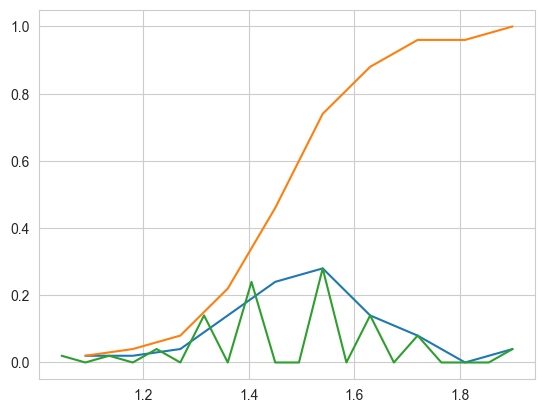

In [18]:

# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a 
# petal_length of less than 5?
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal_length

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf)

plt.show()


[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


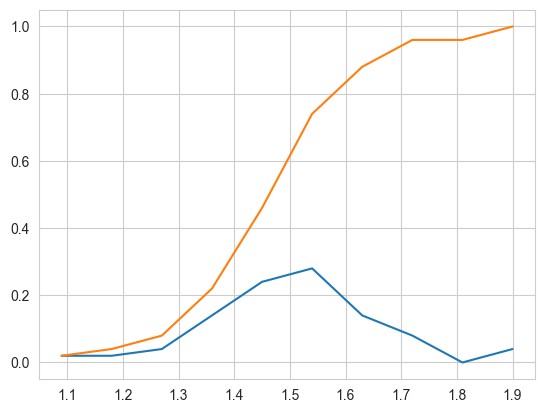

In [19]:
# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a 
# petal_length of less than 1.6?
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal_length

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show()

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


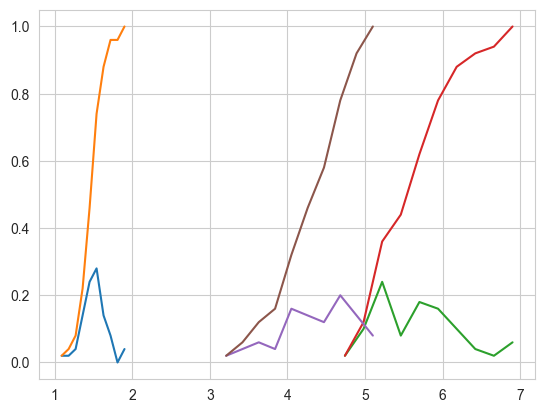

In [20]:
# Plots of CDF of petal_length for various types of flowers.

# Misclassification error if you use petal_length only.

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# virginica
counts, bin_edges = np.histogram(iris_virginica['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#versicolor
counts, bin_edges = np.histogram(iris_versicolor['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


plt.show()

# (3.5) Mean, Variance and Std-dev

In [21]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(iris_setosa["petal_length"]))

#Mean with an outlier.
print(np.mean(np.append(iris_setosa["petal_length"],50)));
print(np.mean(iris_virginica["petal_length"]))
print(np.mean(iris_versicolor["petal_length"]))

print("\nStd-dev:");
print(np.std(iris_setosa["petal_length"]))
print(np.std(iris_virginica["petal_length"]))
print(np.std(iris_versicolor["petal_length"]))

Means:
1.464
2.4156862745098038
5.5520000000000005
4.26

Std-dev:
0.17176728442867112
0.546347874526844
0.4651881339845203


# (3.6) Median, Percentile, Quantile, IQR, MAD

In [22]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(iris_setosa["petal_length"]))

#Median with an outlier
print(np.median(np.append(iris_setosa["petal_length"],50)));
print(np.median(iris_virginica["petal_length"]))
print(np.median(iris_versicolor["petal_length"]))


print("\nQuantiles:")
print(np.percentile(iris_setosa["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_virginica["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor["petal_length"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(iris_setosa["petal_length"],90))
print(np.percentile(iris_virginica["petal_length"],90))
print(np.percentile(iris_versicolor["petal_length"], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(iris_setosa["petal_length"]))
print(robust.mad(iris_virginica["petal_length"]))
print(robust.mad(iris_versicolor["petal_length"]))



Medians:
1.5
1.5
5.55
4.35

Quantiles:
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]

90th Percentiles:
1.7
6.31
4.8

Median Absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


# (3.7) Box plot and Whiskers

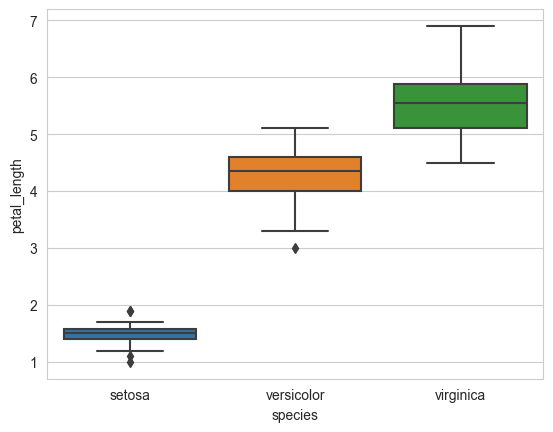

In [23]:

#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.
# How to draw the box in the box-plot?
# How to draw whiskers: [no standard way] Could use min and max or use other complex statistical techniques.
# IQR like idea.

#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='species',y='petal_length', data=iris)
plt.show()

# (3.8) Violin plots

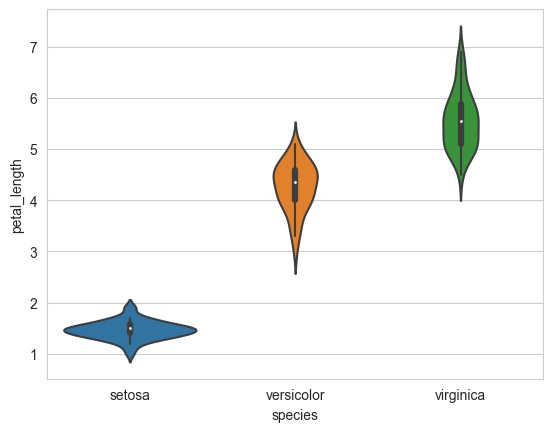

In [24]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="species", y="petal_length", data=iris, height=8)
plt.show()

# (3.9) Multivariate probability density, contour plot.


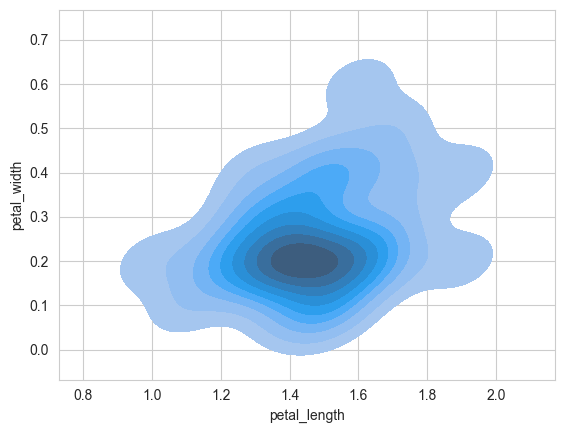

In [31]:
#2D Density plot, contours-plot
sns.kdeplot(x="petal_length", y="petal_width", data=iris_setosa, fill=True)
plt.show()


In [32]:
iris_virginica_SW = iris_virginica.iloc[:,1]
iris_versicolor_SW = iris_versicolor.iloc[:,1]



In [33]:
from scipy import stats
stats.ks_2samp(iris_virginica_SW, iris_versicolor_SW)


KstestResult(statistic=0.26, pvalue=0.06779471096995852, statistic_location=2.9, statistic_sign=-1)

In [34]:
x = stats.norm.rvs(loc=0.2, size=10)
stats.kstest(x,'norm')


KstestResult(statistic=0.1836897657011608, pvalue=0.8301296897835425, statistic_location=0.9013927563942365, statistic_sign=1)

In [35]:
x = stats.norm.rvs(loc=0.2, size=100)
stats.kstest(x,'norm')


KstestResult(statistic=0.07823347729103258, pvalue=0.5467863309075307, statistic_location=0.5193265448415325, statistic_sign=-1)

In [36]:
x = stats.norm.rvs(loc=0.2, size=1000)
stats.kstest(x,'norm')


KstestResult(statistic=0.083539089328726, pvalue=1.610711426406914e-06, statistic_location=0.13207898054143277, statistic_sign=-1)